In [327]:
import pandas as pd
import matplotlib.pyplot as plt

## Step1: Read Data

In [83]:
df=pd.read_csv("./data/cleaned_data.csv")

In [84]:
df.shape

(10, 9)

In [85]:
df.head(4)

,Unnamed: 0,Id,Title,EventType,PdfName,Abstract,PaperText,AbstractClean,PaperTextClean
0,0,5677,Double or Nothing: Multiplicative Incentive Me...,Poster,5677-double-or-nothing-multiplicative-incentiv...,Crowdsourcing has gained immense popularity in...,Double or Nothing: Multiplicative\nIncentive M...,crowdsourcing gained immense popularity machin...,double nothing multiplicative incentive mechan...
1,1,5941,Learning with Symmetric Label Noise: The Impor...,Spotlight,5941-learning-with-symmetric-label-noise-the-i...,Convex potential minimisation is the de facto ...,Learning with Symmetric Label Noise: The\nImpo...,convex potential minimisation de facto approac...,learning symmetric label noise importance unhi...
2,2,6019,Algorithmic Stability and Uniform Generalization,Poster,6019-algorithmic-stability-and-uniform-general...,One of the central questions in statistical le...,Algorithmic Stability and Uniform Generalizati...,one central questions statistical learning the...,algorithmic stability uniform generalization i...
3,3,6035,Adaptive Low-Complexity Sequential Inference f...,Poster,6035-adaptive-low-complexity-sequential-infere...,We develop a sequential low-complexity inferen...,Adaptive Low-Complexity Sequential Inference f...,develop sequential lowcomplexity inference pro...,adaptive lowcomplexity sequential inference di...


In [86]:
paper_id=list(df['Id'])

In [87]:
from __future__ import division
from collections import Counter, defaultdict
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import numpy.core.defchararray as npd
import spacy
from spacy.lang.en import English
nlp = spacy.load('en')
import re

In [304]:
class test1:
    def _iter_nouns(self, sent):
        '''
        INPUT: SentCustomProperties
        OUTPUT: str

        Iterates through each token of spacy sentence and collects lemmas of all nouns into a set.
        '''        
        wordset = set()
        noun_tag = set(['NN', 'NNP', 'NNS'])
        nonaspects=set()
        c=0
        for token in doc:#nlp(sent):
            c+=1
            if c <100:
                try:
                    #print("test")
                    root = nlp.vocab[token.lemma].prob 
                    root1= nlp.vocab[token.lemma].vector_norm
                    print(root1,root,token.tag_)
                    # filter to only consider nouns, valid aspects, and uncommon words
                    if token.tag_ in noun_tag :#and (root < -3.5 and token.lemma_ not in nonaspects):
                        #print(root1,root,token.tag_)
                        wordset.add(token)#, token.lemma_)
                except:
                    continue               
            else:
                break
        #print(wordset)
        #for token in doc: 
        #    print(token.text, token.lemma_, token.pos_, token.tag_)
        #return " ".join(wordset)

In [301]:
import nltk

In [302]:
def jjnn_pairs(phrase):
    '''
    Iterate over pairs of JJ-NN.
    '''
    tagged = nltk.pos_tag(nltk.word_tokenize(phrase))
    def ngramise(sequence):
        """
        generate bigrams
        """
        for bigram in nltk.ngrams(sequence, 2):
            yield bigram

    for ngram in ngramise(tagged):
        tokens, tags = zip(*ngram)
        if tags == ('JJ', 'NN'):
            print(tokens,tags)

In [303]:
s = ["thai iced tea spicy fried chicken sweet chili pork thai chicken curry"]
for phrase in s:
    #print(noun_notnoun(phrase))
    print(jjnn_pairs(phrase))

('sweet', 'chili') ('JJ', 'NN')
None


In [305]:
class test:
    def _iter_nouns(self, sent):
        '''
        INPUT: SentCustomProperties
        OUTPUT: str
        Iterates through each token of spacy sentence and collects lemmas of all nouns into a set.
        '''
        # dictionary of unigram_nouns
        unigram_wordset = dict()
        # Identify noun tags
        noun_tag = set(['NN', 'NNP', 'NNS'])
        # List of keywords we want to exclude 
        nonaspects=set()
            
        for token in sent:            
            # filter to only consider nouns, valid aspects, and uncommon words
            if token.tag_ in noun_tag and token.lemma_ not in nonaspects:
                if token.lemma_ in unigram_wordset:
                    unigram_wordset[token.lemma_]+=1
                else:
                    unigram_wordset[token.lemma_]= 1

        # Note: We need to normalize the count of nouns with respect to the total noun counts 
        # as in certain scenarios there will be few nouns and we can't pick nouns based on count
        nouns_count=sum([val for val in unigram_wordset.values()])
        
        unigram_wordset_norm={key: val/nouns_count for (key,val) in unigram_wordset.items()}
        top_aspects=[aspect for aspect in unigram_wordset_norm.keys() if unigram_wordset_norm[aspect]>0.01]
        print(top_aspects)

In [258]:
a=test()

In [306]:
for i in paper_id[:1]:
    nlp = spacy.load('en_core_web_sm') # this is for core english
    nlp.add_pipe(nlp.create_pipe('sentencizer'))
    doc=nlp(str(df[df.Id==i]['PaperTextClean'][0])) #Spacy Doc type
    #print(type(doc))
    a._iter_nouns(doc)

['mechanism', 'crowdsourcing', 'amount', 'datum', 'payment', 'worker', 'question', 'experiment', 'task', 'algorithm', 'answer', 'confidence', 'g']


## Task 1: Generate FastText word embeddings
1. support a user-defined number of dimensions 
2. have the ability to turn on/off at least one text-preprocessing step.

### Step 1: Preprocessing data
- data be in str format for python 3 
space
tab
vertical tab
carriage return
formfeed
the null character

#### text preprocessing guidelines - 
https://www.kdnuggets.com/2018/08/practitioners-guide-processing-understanding-text-2.html

from nltk.corpus import gutenberg
from string import punctuation

bible = gutenberg.sents('bible-kjv.txt')
from string import punctuation
remove_terms = punctuation + '0123456789'
!python -m spacy link en_core_web_sm en

In [307]:
#import en_core_web_sm
#nlp = en_core_web_sm.load()
import spacy
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
from bs4 import BeautifulSoup
#from pycontractions import Contractions
import unicodedata

import spacy
nlp = spacy.load('en')
#nlp = spacy.load('en_core', parse=True, tag=True, entity=True)
#nlp_vec = spacy.load('en_vecs', parse = True, tag=True, #entity=True)
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

In [308]:
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

In [309]:
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

In [310]:
#df.Abstract[:10].apply(remove_accented_chars)

In [93]:
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

remove_special_characters("Well this was fun! What do you think? 123#@!", remove_digits=True)
#df.Abstract[:10].apply(remove_special_characters)

'Well this was fun What do you think '

In [313]:
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

#simple_stemmer("My system keeps crashing his crashed yesterday, ours crashes daily")

In [314]:
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

#lemmatize_text("My system keeps crashing! his crashed yesterday, ours crashes daily")

In [315]:
#df.Abstract[:10].apply(lemmatize_text)

In [317]:
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

#remove_stopwords("The, and, if are stopwords, computer is not")

In [318]:
def normalize_corpus(doc, html_stripping=False, accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True, remove_digits=True):
    #normalized_corpus = []
    # normalize each document in the corpus
    #for doc in corpus:
    # strip HTML
    if html_stripping:
        doc = strip_html_tags(doc)

    # remove accented characters
    if accented_char_removal:
        doc = remove_accented_chars(doc)

    # lowercase the text    
    if text_lower_case:
        doc = doc.lower()

    # remove extra newlines
    doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)

    # lemmatize text
    if text_lemmatization:
        doc = lemmatize_text(doc)

    # remove special characters and\or digits    
    if special_char_removal:
        # insert spaces between special characters to isolate them    
        special_char_pattern = re.compile(r'([{.(-)!}])')
        doc = special_char_pattern.sub(" \\1 ", doc)
        doc = remove_special_characters(doc, remove_digits=remove_digits)  

    # remove extra whitespace
    doc = re.sub(' +', ' ', doc)

    # remove stopwords
    # http://www.cs.cornell.edu/~xanda/stopwords2017.pdf
    if stopword_removal:
        doc = remove_stopwords(doc, is_lower_case=text_lower_case)

    #normalized_corpus.append(doc)
    return doc
    #return normalized_corpus

In [319]:
#html_stripping=False, 
#accented_char_removal=True, text_lower_case=True,text_lemmatization=False, special_char_removal=True, stopword_removal=False, remove_digits=True))
#df['AbstractClean']=df.Abstract.apply(normalize_corpus, args=(False, True, True, True, True, True, True))
#    True, True, True,True,True, True, True))

In [320]:
#df['PaperTextClean']=df.PaperText.apply(normalize_corpus, args=(False, True, True, True, True, True, True))

In [321]:
df.head(2)

,Unnamed: 0,Id,Title,EventType,PdfName,Abstract,PaperText,AbstractClean,PaperTextClean
0,0,5677,Double or Nothing: Multiplicative Incentive Me...,Poster,5677-double-or-nothing-multiplicative-incentiv...,Crowdsourcing has gained immense popularity in...,Double or Nothing: Multiplicative\nIncentive M...,crowdsourcing gained immense popularity machin...,double nothing multiplicative incentive mechan...
1,1,5941,Learning with Symmetric Label Noise: The Impor...,Spotlight,5941-learning-with-symmetric-label-noise-the-i...,Convex potential minimisation is the de facto ...,Learning with Symmetric Label Noise: The\nImpo...,convex potential minimisation de facto approac...,learning symmetric label noise importance unhi...


In [322]:
# ref: https://www.kdnuggets.com/2018/05/implementing-deep-learning-methods-feature-engineering-text-data-fasttext.html
# ref: https://radimrehurek.com/gensim/models/fasttext.html
from gensim.models.fasttext import FastText
import nltk
wpt = nltk.WordPunctTokenizer()
#tokenized_corpus = [wpt.tokenize(document) for document in norm_bible[:1000]]
tokenized_corpus = [wpt.tokenize(document) for document in list(df.AbstractClean)]#[:10])]   

In [323]:
#tokenized_corpus

In [324]:
# Set values for various parameters
feature_size = 100    # Word vector dimensionality  
window_context = 50   # Context window size                                                                                    
min_word_count = 5    # Minimum word count                        
sample = 1e-3         # Downsample setting for frequent words
mode=1               # sg decides whether to use the skip-gram model (1) or CBOW (0)
ft_model = FastText(tokenized_corpus, size=feature_size, window=window_context, 
                    min_count=min_word_count,sample=sample, sg=mode, iter=50)

In [325]:
# view similar words based on gensim's FastText model
similar_words = {search_term: [item[0] for item in ft_model.wv.most_similar([search_term], topn=10)]
                  for search_term in ['crowdsourcing','classification','regularised','experiments']}
similar_words    

/usr/local/lib/python3.7/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


{'crowdsourcing': ['loss',
  'learning',
  'algorithmic',
  'stability',
  'logarithmic',
  'clustering',
  'propose',
  'mechanism',
  'data',
  'convex'],
 'classification': ['clustering',
  'number',
  'problem',
  'propose',
  'logarithmic',
  'mechanism',
  'loss',
  'data',
  'size',
  'learning'],
 'regularised': ['propose',
  'large',
  'number',
  'problem',
  'logarithmic',
  'loss',
  'size',
  'learning',
  'data',
  'show'],
 'experiments': ['number',
  'clustering',
  'learning',
  'large',
  'problem',
  'approach',
  'algorithmic',
  'mechanism',
  'show',
  'stability']}

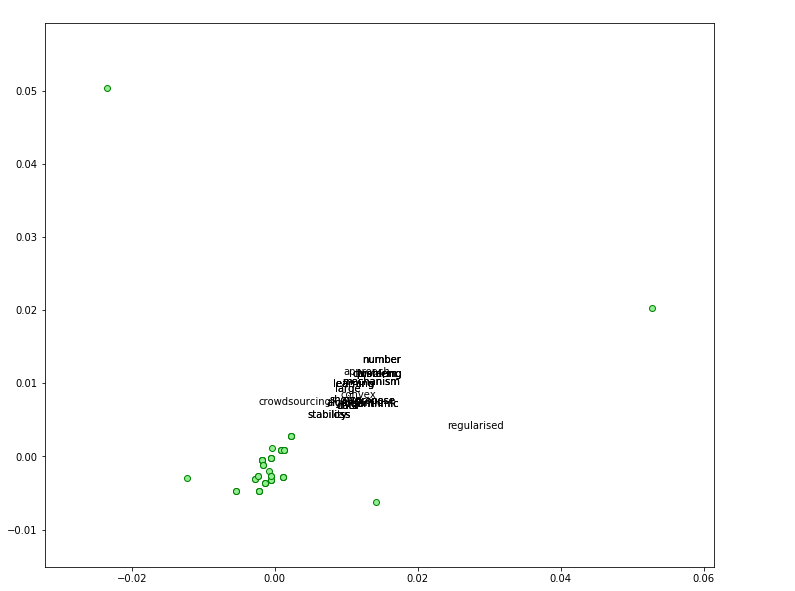

In [329]:
from sklearn.decomposition import PCA

words = sum([[k] + v for k, v in similar_words.items()], [])
wvs = ft_model.wv[words]

pca = PCA(n_components=2)
np.set_printoptions(suppress=True)
P = pca.fit_transform(wvs)
labels = words

plt.figure(figsize=(12,10))
plt.scatter(P[:, 0], P[:, 1], c='lightgreen', edgecolors='g')
for label, x, y in zip(labels, P[:, 0], P[:, 1]):
    plt.annotate(label, xy=(x+0.01, y+0.01), xytext=(0, 0), textcoords='offset points')

plt.show()

## Task 3: Generate document clustering

In [ ]:
# Reusing the tokenized keywords in cluster for training

In [331]:
df.shape

(10, 9)

In [333]:
# load nltk's SnowballStemmer as variabled 'stemmer'
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [332]:
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    #tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    #filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    #for token in tokens:
    #    if re.search('[a-zA-Z]', token):
    #        filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in text]
    return stems

In [338]:
totalvocab_stemmed=[]
df.PaperTextClean.apply(lambda x: totalvocab_stemmed.extend(tokenize_and_stem(x)))

0    None
1    None
2    None
3    None
4    None
5    None
6    None
7    None
8    None
9    None
Name: PaperTextClean, dtype: object

In [341]:
len(totalvocab_stemmed)

31376

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = ["welcome to stackoverflow my friend", 
          "my friend, don't worry, you can get help from stackoverflow"]
vectorizer = TfidfVectorizer()
matrix = vectorizer.fit_transform(corpus)
print(matrix)


from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(synopses) #fit the vectorizer to synopses

print(tfidf_matrix.shape)


#### LDA

In [97]:
from gensim import corpora, models, similarities
from itertools import chain
#https://stackoverflow.com/questions/15016025/how-to-print-the-lda-topics-models-from-gensim-python
""" DEMO """
documents1 = ["Human machine interface for lab abc computer applications",
             "A survey of user opinion of computer system response time",
             "The EPS user interface management system",
             "System and human system engineering testing of EPS",
             "Relation of user perceived response time to error measurement",
             "The generation of random binary unordered trees",
             "The intersection graph of paths in trees",
             "Graph minors IV Widths of trees and well quasi ordering",
             "Graph minors A survey"]
documents =[(i,documents1[i]) for i in range(len(documents1))]

# remove common words and tokenize
stoplist = set('for a of the and to in'.split())
texts = [[word for word in document[1].lower().split() if word not in stoplist] for document in documents]

all_tokens = sum(texts, [])#tokens

# remove words that appear only once
tokens_once = set(word for word in set(all_tokens) if all_tokens.count(word) == 1)
texts1 = [[word for word in text if word not in tokens_once] for text in texts]


# Create Dictionary.
id2word = corpora.Dictionary(texts)
# Creates the Bag of Word corpus.
mm = [id2word.doc2bow(text) for text in texts]

# Trains the LDA models.
lda = models.ldamodel.LdaModel(corpus=mm, id2word=id2word, num_topics=3, \
                               update_every=1, chunksize=10000, passes=1)

# Prints the topics.
for top in lda.print_topics():
    print(top)


# Assigns the topics to the documents in corpus
lda_corpus = lda[mm]

# Find the threshold, let's set the threshold to be 1/#clusters,
# To prove that the threshold is sane, we average the sum of all probabilities:
scores = list(chain(*[[score for topic_id,score in topic] for topic in [doc for doc in lda_corpus]]))

[lda_corpus[i] for i in range(3)]
threshold = sum(scores)/len(scores)

print (threshold)
print

cluster1 = [j[0] for i,j in zip(lda_corpus,documents) if i[0][1] > threshold]
cluster2 = [j[0] for i,j in zip(lda_corpus,documents) if i[1][1] > threshold]
cluster3 = [j[0] for i,j in zip(lda_corpus,documents) if i[2][1] > threshold]

print (cluster1)
print (cluster2)
print (cluster3)

lda.show_topic(1, topn = 5)

lda.num_topics

(0, '0.104*"system" + 0.072*"survey" + 0.071*"graph" + 0.043*"user" + 0.042*"trees" + 0.042*"eps" + 0.042*"time" + 0.042*"computer" + 0.042*"human" + 0.042*"opinion"')
(1, '0.095*"interface" + 0.057*"system" + 0.056*"user" + 0.055*"human" + 0.055*"eps" + 0.055*"lab" + 0.055*"computer" + 0.055*"management" + 0.055*"machine" + 0.054*"applications"')
(2, '0.072*"trees" + 0.043*"graph" + 0.042*"minors" + 0.042*"response" + 0.042*"user" + 0.042*"time" + 0.042*"well" + 0.042*"widths" + 0.042*"quasi" + 0.042*"measurement"')
0.3333333354029391
[1, 3, 6, 8]
[0, 2]
[4, 5, 7]


3

In [108]:
import numpy as np
topics_matrix = lda.show_topics(formatted=False, num_words=20)
#topics_matrix = np.array(topics_matrix)
#[[k for k in i] for i in topics_matrix]
#print(topics_matrix)
cluster_word_map={key: lda.show_topic(key, topn = 10) for key in range(lda.num_topics)}

In [121]:
cluster_word_map={key: lda.show_topic(key, topn = 10) for key in range(lda.num_topics)}
cluster_word_map={key:[i[0] for i in val] for key,val in cluster_word_map.items()}

In [122]:
cluster_word_map

{0: ['system',
  'survey',
  'graph',
  'user',
  'trees',
  'eps',
  'time',
  'computer',
  'human',
  'opinion'],
 1: ['interface',
  'system',
  'user',
  'human',
  'eps',
  'lab',
  'computer',
  'management',
  'machine',
  'applications'],
 2: ['trees',
  'graph',
  'minors',
  'response',
  'user',
  'time',
  'well',
  'widths',
  'quasi',
  'measurement']}

In [123]:
import json

with open('test.json','w') as f:
    json.dump(cluster_word_map,f)

In [96]:
lda.save('test')

In [94]:
from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary
lda = models.ldamodel.LdaModel.load(test)

NameError: name 'test' is not defined

In [8]:
import pandas as pd
df=pd.read_csv("./input/cleaned_data.csv")

In [18]:
df.columns

Index(['Unnamed: 0', 'Id', 'Title', 'EventType', 'PdfName', 'Abstract',
       'PaperText', 'AbstractClean', 'PaperTextClean'],
      dtype='object')

In [5]:
#df.PaperTextClean.iloc[0]

In [15]:
from gensim import corpora, models, similarities
from itertools import chain
class document_clustering:
    def __init__(self,data):
        self.data=data
        self.lda_model=None
        self.documents_cluster=dict()
        self.cluster_word_map=dict()
        
    def get_document_cluster(self, topic_count=5):
        # create a document corpus for LDA
        documents =[(i,j) for i,j in zip(self.data.Title, self.data.PaperTextClean)]
        
        # Make sure to include words which have a minimum length of 3
        # NOTE: this is to avoid cases where cleaning removes non alphabetic characters (pg13 -> pg)
        document_updated= [[word for word in document[1].lower().split() if len(word)>3 ] for document in documents]

        # create list of token
        all_tokens = sum(document_updated, [])

        # remove words that appear only once
        tokens_once = set(word for word in set(all_tokens) if all_tokens.count(word) == 1)

        texts = [[word for word in text if word not in tokens_once] for text in document_updated]

        # Create Dictionary for word corpora
        id2word = corpora.Dictionary(texts)

        # Creates the Bag of Word corpus.
        bag_of_words = [id2word.doc2bow(text) for text in texts]

        # Trains the LDA models.
        self.lda_model = models.ldamodel.LdaModel(corpus=bag_of_words, id2word=id2word, num_topics=topic_count, update_every=1, chunksize=10000, passes=1)

        # Assigns the topics to the documents in corpus
        lda_corpus = self.lda_model[bag_of_words]

        # Find threshold for document to be part of cluster, threshold to be 1/#clusters,
        # Average the sum of all probabilities:
        scores = list(chain(*[[score for topic_id,score in topic] for topic in [doc for doc in lda_corpus]]))
        threshold = sum(scores)/len(scores)

        # saving the LDA Model
        #self.lda_model.save("../models/lda_model")
        
        # Generate document cluster for each topic
        # Document cluster - {cluster_id: [list of documents]}
        for i in range(len(document_updated)):
            for j in lda_corpus[i]:
                if j[1] > threshold:
                    key=j[0]
                    if key in self.documents_cluster:
                        self.documents_cluster[j[0]].append(documents[i][0])
                    else:
                        self.documents_cluster[j[0]]=[documents[i][0]]      
        
        # Generate list of words corresponding to cluster
        # {cluster_id: [(word, significance of word)]}
        self.cluster_word_map={key: self.lda_model.show_topic(key, topn = 10) for key in range(self.lda_model.num_topics)}
        #print(self.cluster_word_map)

In [17]:
df1=df[:100]
obj=document_clustering(df1)
obj.get_document_cluster()
obj.documents_cluster
#obj.cluster_word_map

{4: ['Double or Nothing: Multiplicative Incentive Mechanisms for Crowdsourcing',
  'Robust Portfolio Optimization',
  'Unlocking neural population non-stationarities using hierarchical dynamics models',
  'Bayesian Manifold Learning: The Locally Linear Latent Variable Model (LL-LVM)',
  'Fast and Accurate Inference of Plackett–Luce Models',
  'Probabilistic Line Searches for Stochastic Optimization',
  'Algorithms with Logarithmic or Sublinear Regret for  Constrained Contextual Bandits',
  'Automatic Variational Inference in Stan',
  'Online Rank Elicitation for Plackett-Luce: A Dueling Bandits Approach',
  'Black-box optimization of noisy functions with unknown smoothness',
  'Subspace Clustering with Irrelevant Features via Robust Dantzig Selector'],
 0: ['Learning with Symmetric Label Noise: The Importance of Being Unhinged',
  'Algorithmic Stability and Uniform Generalization',
  'Adaptive Low-Complexity Sequential Inference for Dirichlet Process Mixture Models',
  'A Convergent Gr